# Customer Segmentation using Clustering

In [25]:
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np

sns.set_style('whitegrid')
sns.set_context('poster')

# Data
This data set comes from the UCI Machine Learning Repository (Called the Online Retail II dataset). Each observation is an invoice for a specific item. The data was in an Excel format but I converted it to a CSV in my previous notebook.

In [6]:
data = pd.read_csv('../../Downloads/clean_customer_retail.csv')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.set_index('Customer ID', inplace = True)

In [7]:
data.head()

,10002,10080,10109,10120,10125,10133,10134,10135,10138,11001,...,C2,PADS,SP1002,Revenue,Orders,Items,AvgItemsOrder,AvgRevenueOrder,AvgRevenueItem,Country
Customer ID,,,,,,,,,,,,,,,,,,,,,
12346,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,169.36,2,24.0,12.000000,84.680,7.056667,United Kingdom
12347,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5383.72,8,2727.0,340.875000,672.965,1.974228,Iceland
12348,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,816.24,4,1048.0,262.000000,204.060,0.778855,Finland
12349,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3678.69,3,1621.0,540.333333,1226.230,2.269395,Italy
12350,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,294.40,1,196.0,196.000000,294.400,1.502041,Norway


# Pre-processing
I limit the variables of interest to just the metrics because when consumer purchase data are included (even after dimensionality reduction) they tend to make clusters that do not appear to convey any meaningful insight. This helps keeps the clustering simple, and also provides a solid starting point for other research if you decide to sub-cluster.

In [8]:
metrics = ['Revenue', 'Orders', 'Items', 'AvgItemsOrder', 'AvgRevenueOrder', 'AvgRevenueItem']

In [9]:
# Scale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))

prep_scaled = scaler.fit_transform(data[metrics])

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## K-Means Clustering

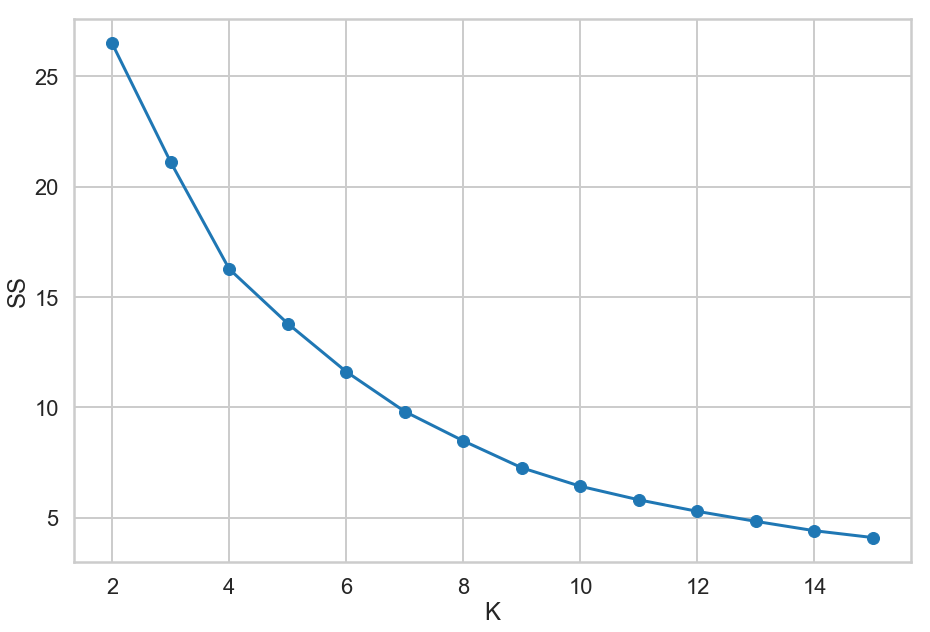

In [10]:
from sklearn.cluster import KMeans

SSs = []
for k in range(2,16):
    model = KMeans(n_clusters=k, random_state=13)
    model.fit(prep_scaled)
    SSs.append(model.inertia_)

fig, ax = plt.subplots(1, figsize=(15, 10))
plt.plot(range(2,16), SSs, '-o')
plt.xlabel('K')
plt.ylabel('SS')
plt.show()

The elbow appears to lay between 5, 6, and 7. It's worth double check with silhouette plots which **K**  I should choose.

K = 2 | Silhouette Score: 0.616274596058768


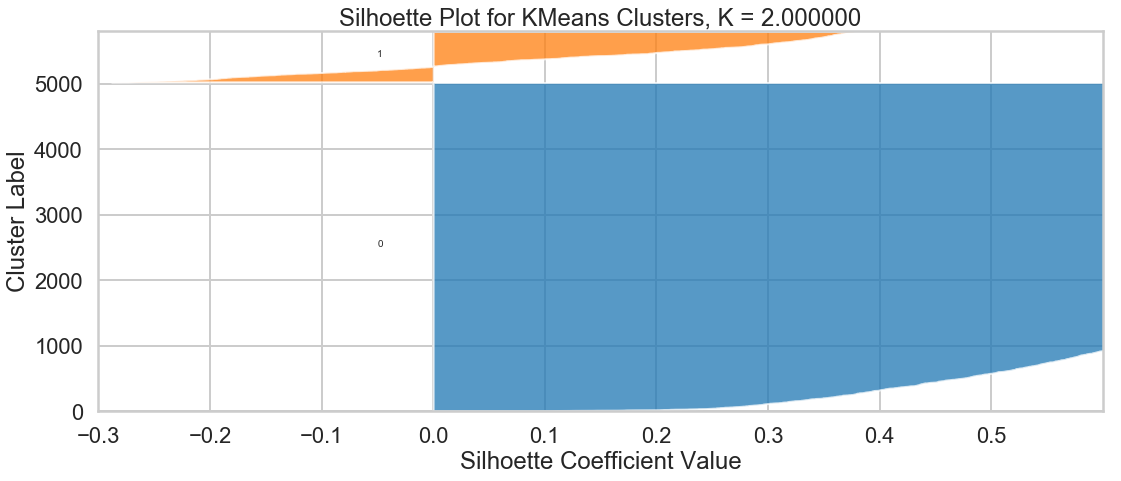

K = 3 | Silhouette Score: 0.5954176892813124


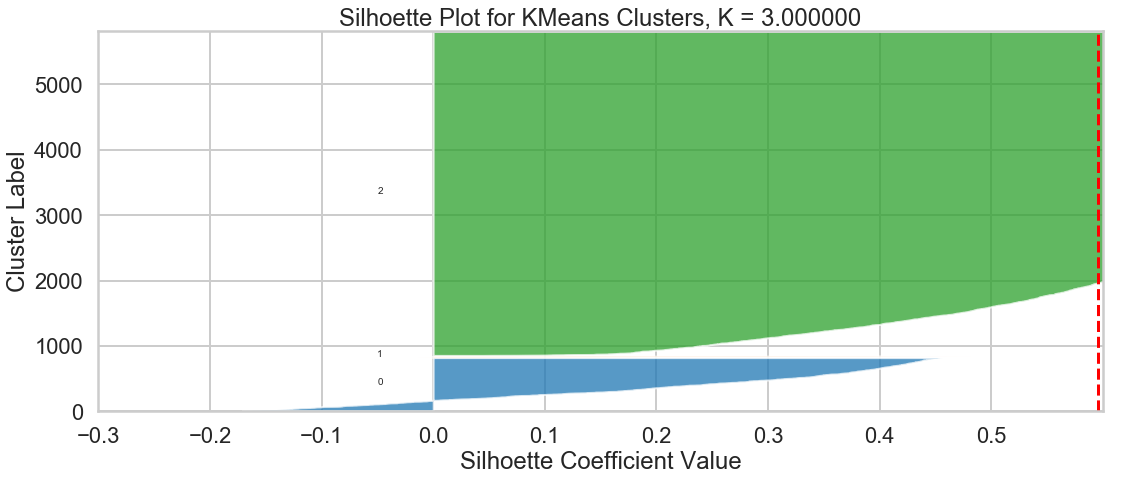

K = 4 | Silhouette Score: 0.522944482624978


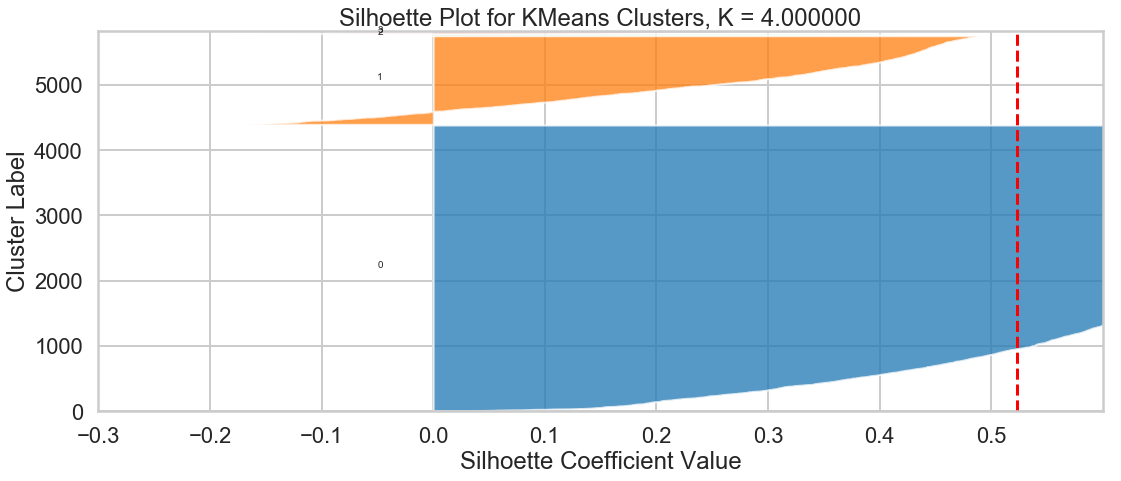

K = 5 | Silhouette Score: 0.4324082183574729


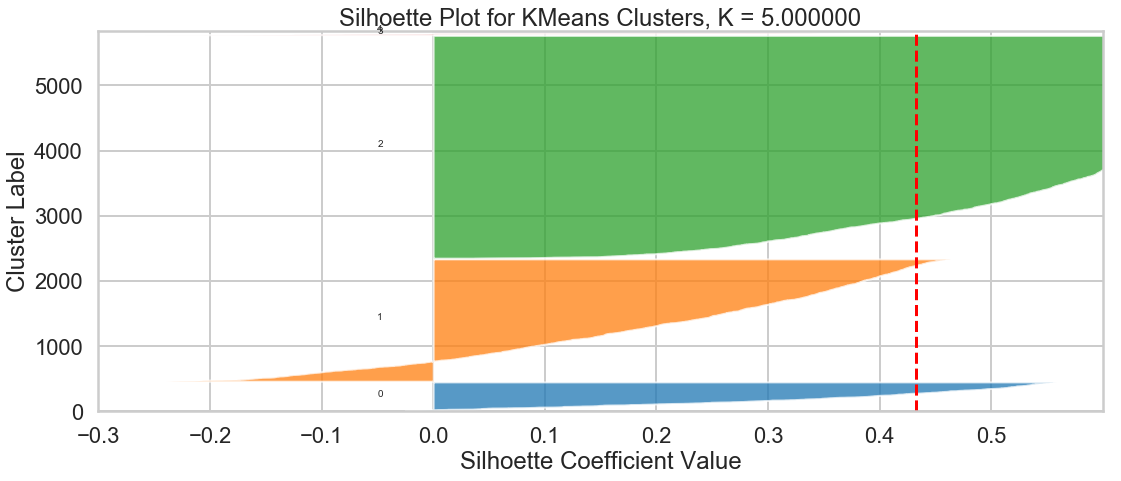

K = 6 | Silhouette Score: 0.4445025185599054


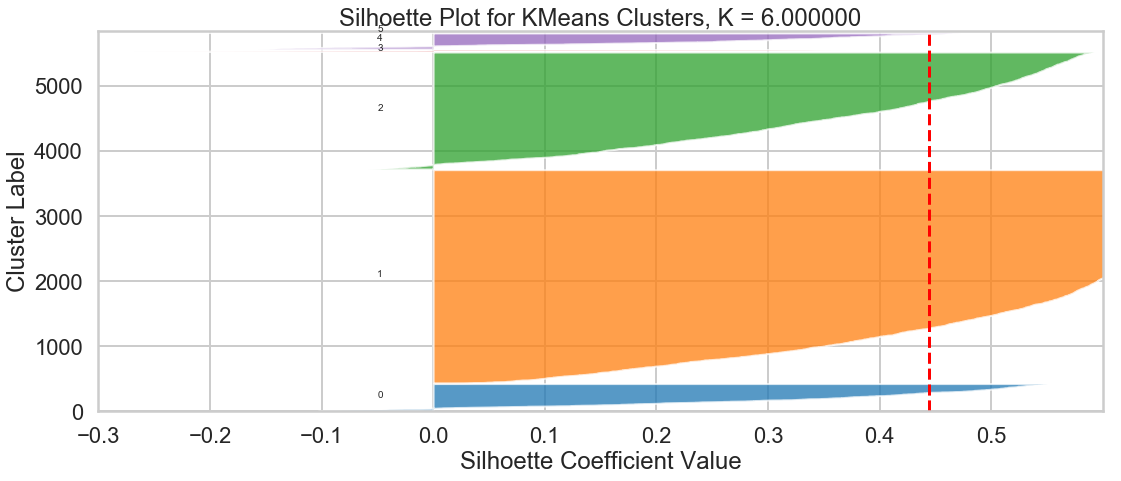

K = 7 | Silhouette Score: 0.4453231117261897


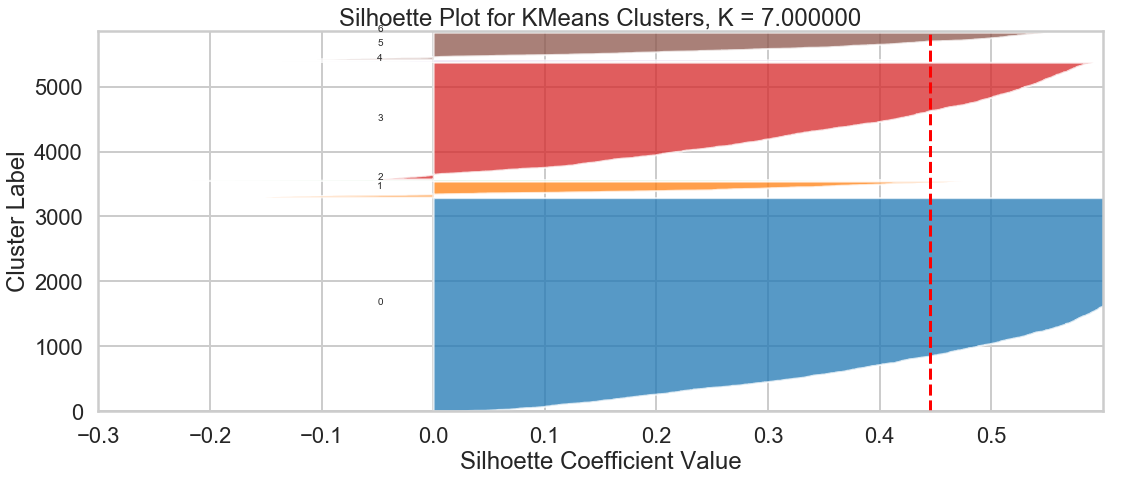

K = 8 | Silhouette Score: 0.4353627743920231


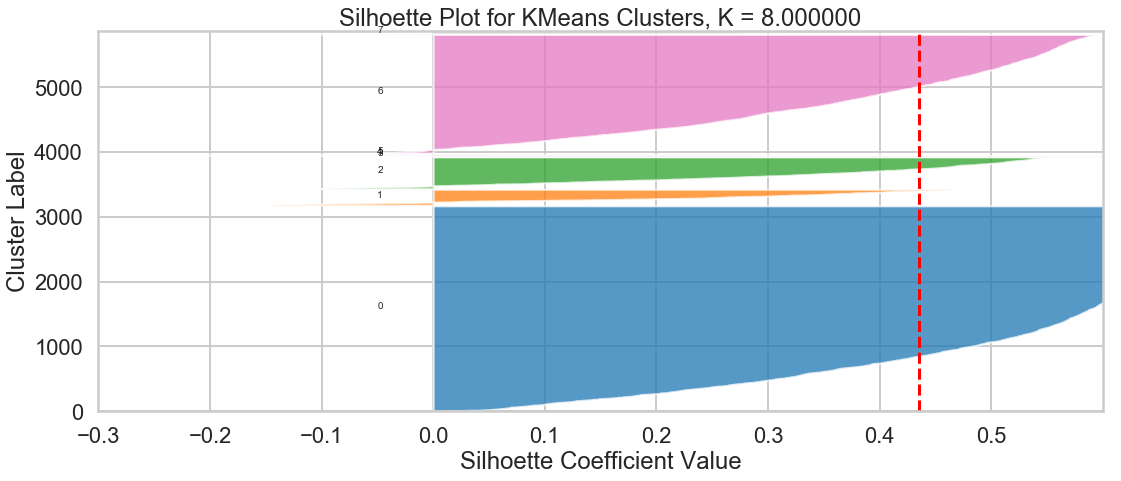

K = 9 | Silhouette Score: 0.43542487687505693


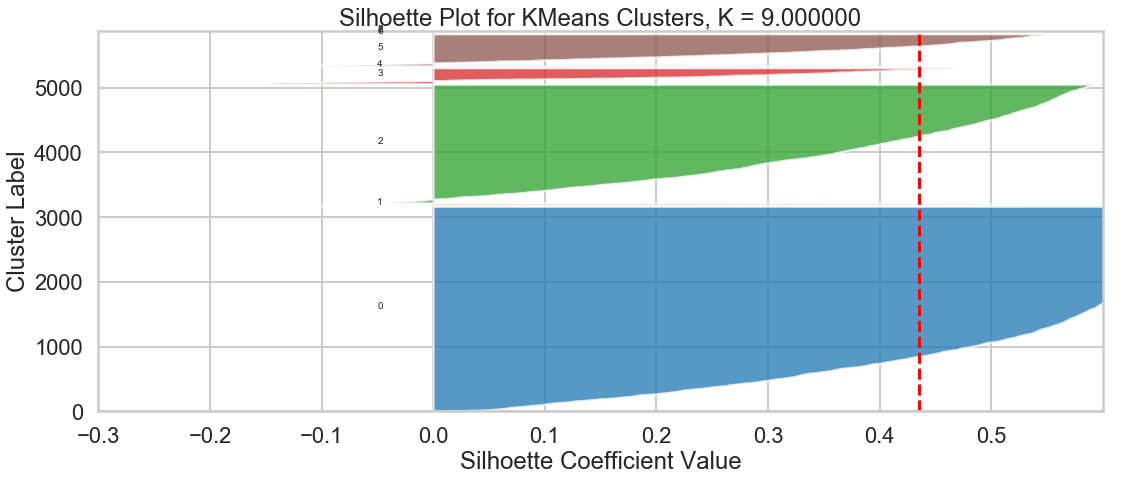

K = 10 | Silhouette Score: 0.3648985017046901


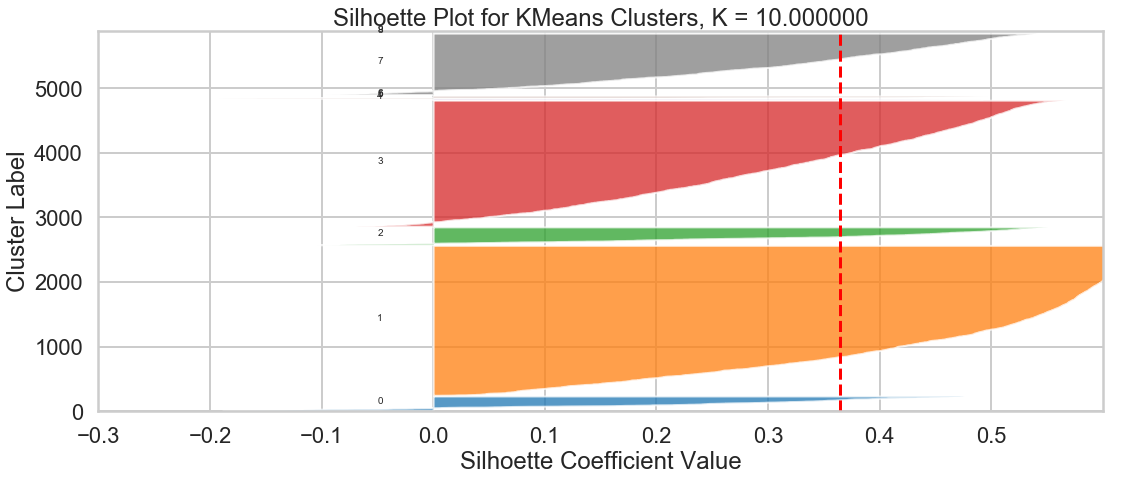

In [14]:
from sklearn.metrics import silhouette_samples, silhouette_score

sil_scores = []
# Loop through K values
for k in range(2,11):
    
    # Set figure limits to make things pretty
    fig, ax = plt.subplots(1, 1)
    fig.set_size_inches(18, 7)
    ax.set_xlim([-0.3, 0.6])
    ax.set_ylim([0, len(prep_scaled) + (k + 1) * 10])

    kmeans = KMeans(n_clusters=k)
    clust = kmeans.fit_predict(prep_scaled)
    
    sil_score = silhouette_score(prep_scaled, clust)
    sil_scores.append(sil_score)
    print("K =", k, "| Silhouette Score:", sil_score)
    
    sil_sample = silhouette_samples(prep_scaled, clust)
    
    lower = 10
    # Loop through each cluster to plot
    for i in range(k):
        i_sample_score = sil_sample[clust == i]
        i_sample_score.sort()
        
        upper = lower + i_sample_score.shape[0]
        ax.fill_betweenx(np.arange(lower, upper),
                         0, i_sample_score, alpha=.75)
        ax.text(-0.05, lower+.5*i_sample_score.shape[0], str(i))
        lower = upper + 10
        
    ax.set_title("Silhoette Plot for KMeans Clusters, K = %f" % k)
    ax.set_xlabel("Silhoette Coefficient Value")
    ax.set_ylabel("Cluster Label")
    # Line for average silhoette value
    ax.axvline(x=sil_score, color="red", linestyle="--")
    
    ax.set_xticks(np.arange(-0.3,0.6,0.1))
    
    plt.show()

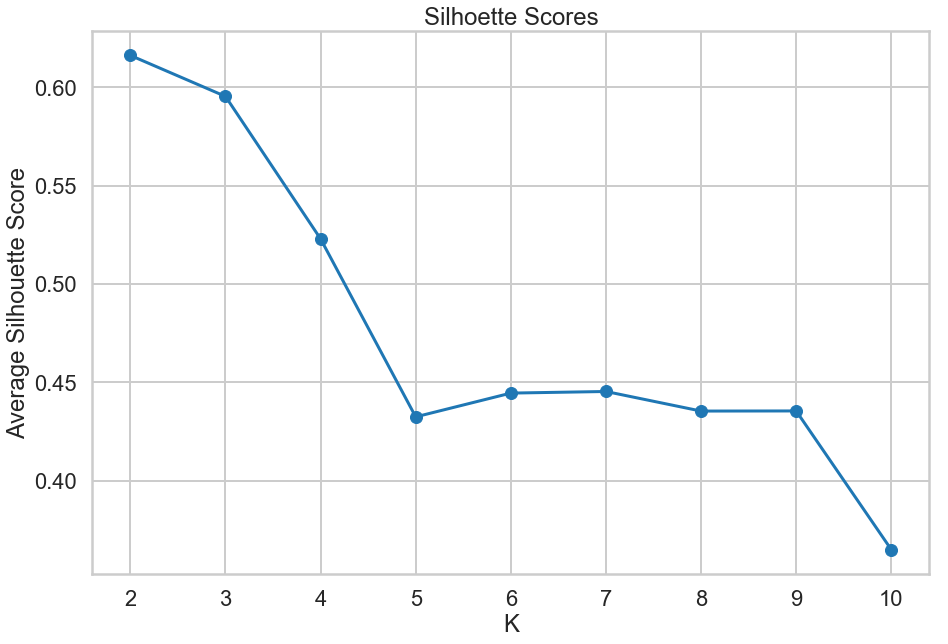

In [18]:
fig, ax = plt.subplots(1, figsize=(15, 10))
plt.plot(range(2,11), sil_scores, '-o')
plt.xlabel('K')
plt.ylabel('Average Silhouette Score')
plt.title('Silhoette Scores')
plt.show()

The marginal benefit between 6 and 7 appears to be slight because of this I'll pick 6 as my official K.

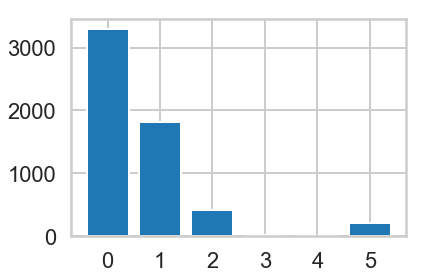

In [21]:
best_kmeans = KMeans(n_clusters=6)
best_kmeans.fit(prep_scaled)
clust = best_kmeans.predict(prep_scaled)

values, counts = np.unique(clust, return_counts=True)
plt.xticks(values)
plt.bar(values, counts)
plt.show()

In [23]:
data_clust = data[metrics]
data_clust['Cluster'] = clust

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


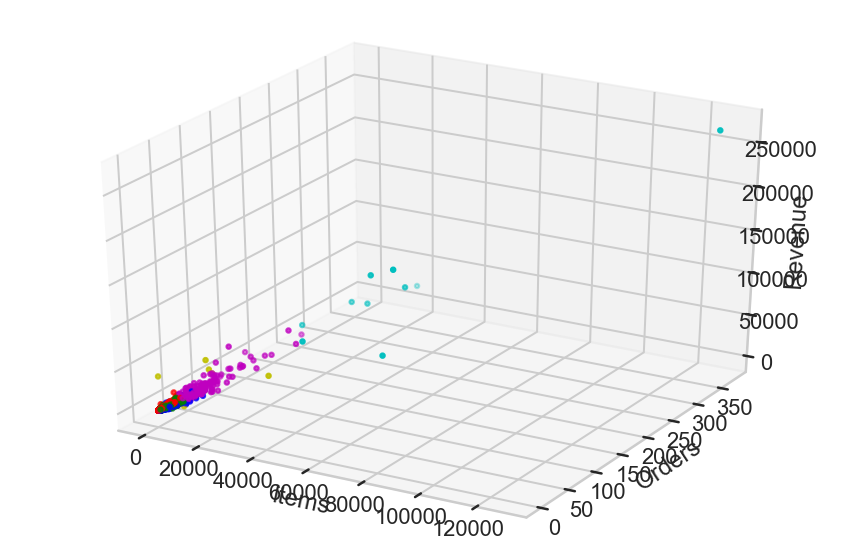

In [38]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

colors = {0:'r', 1:'g', 2:'b', 3:'y', 4:'c', 5:'m'}

ax.scatter(data_clust['Items'],
          data_clust['Orders'],
          data_clust['Revenue'],
          c=data_clust['Cluster'].apply(lambda x: colors[x]))

ax.set_xlabel('Items')
ax.set_ylabel('Orders')
ax.set_zlabel('Revenue')

plt.show()

There appears to be two clusters of "big-spenders." I need to zoom in to see if the other clusters are meaningful.

In [39]:
data_cut = data_clust[data_clust['Revenue'] < 20000]
data_cut = data_cut[data_cut['Items'] < 10000]
data_cut = data_cut[data_cut['Orders'] < 150]

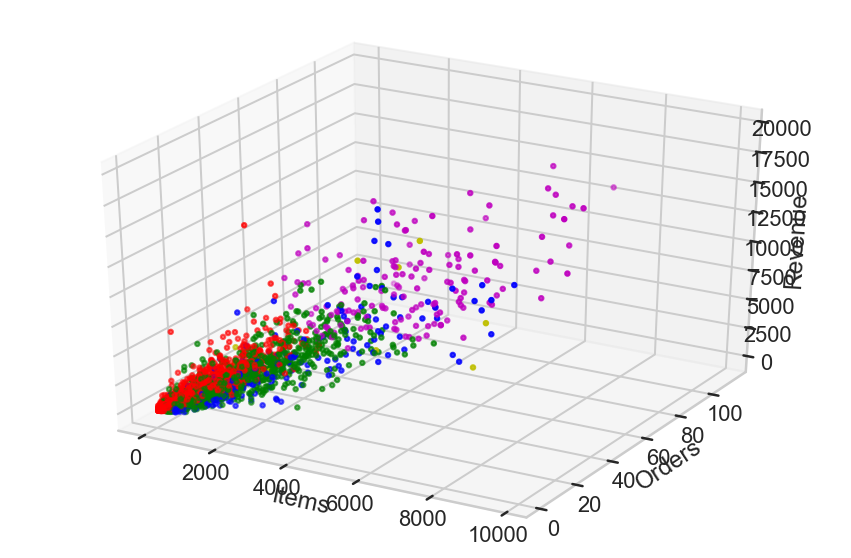

In [40]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111, projection='3d')

colors = {0:'r', 1:'g', 2:'b', 3:'y', 4:'c', 5:'m'}

ax.scatter(data_cut['Items'],
          data_cut['Orders'],
          data_cut['Revenue'],
          c=data_cut['Cluster'].apply(lambda x: colors[x]))

ax.set_xlabel('Items')
ax.set_ylabel('Orders')
ax.set_zlabel('Revenue')

plt.show()

It appears that three "lower-spender" clusters are stacked on top of each other by Revenue, and the last cluster manifests in-between the low-spenders and big-spenders scattered throughout. It might not provide that much value, but there would definitely need to be a better analysis done to determine that.

After this analysis a few more questions came to my mind:
- Is it possible to psychologically profile customers and supplement that data with purchase data?
- What is the profitability of the customers in the cluster?
- Can you analyze the movement of customers between clusters?
- Can customers be "nudged" into other clusters?
- Can we develop a prediction function to acquire new customers we determine to fit into a certian cluster?
- What is

In the context of an actual business these questions would serve as a good starting point to collect additional data to better segment and target customers. 